In [15]:
import numpy as np
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1" 

import matplotlib.pyplot as plt

from Models.LSTM.LSTM import LSTMModel
from Models.LSTM.training.configs import (
    LAYER_VARIATIONS, UNIT_VARIATIONS, DIRECTION_VARIATIONS,
)

from Datasets.nusax_indonesia import NusaxIndonesiaDataset

SAVE_PATH = "Models/LSTM/training"



In [16]:
dropout_rate = 0.2
learning_rate = 0.005
embedding_dim = 128
max_tokens = 10000

In [17]:
# Load dataset
dataset = NusaxIndonesiaDataset(token_maksimum=max_tokens)
if dataset.data_loaded_successfully:
    print("Dataset loaded successfully.")
    data = dataset.get_data()
    X_train = data["x_train"]
    X_train_text = data["x_train_text"]
    y_train = data["y_train"]
    y_train_text = data["y_train_text"]
    X_val = data["x_val"]
    X_val_text = data["x_val_text"]
    y_val = data["y_val"]
    y_val_text = data["y_val_text"]
    X_test = data["x_test"]
    X_test_text = data["x_test_text"]
    y_test = data["y_test"]
    y_tes_text = data["y_test_text"]
    vectorizer = data["vectorizer"]
    label_encoder = data["label_encoder"]
    vocab = data["vocab"]
    sequence_length = dataset.panjang_sekuens
else:
    print("Failed to load dataset.")    

1. Memuat Data
Jumlah data train: 500
Jumlah data validasi: 100
Jumlah data test: 400
Max sequence length (train): 54
Max sequence length (val): 48
Max sequence length (test): 57

2. Label Encoding

3. Vektorisasi

4. Tokenisasi data teks
Dataset loaded successfully.


In [18]:
print(data["y_train"].shape)
print(data["x_train"].shape)
print(sequence_length)

(500,)
(500, 72)
72


In [19]:
def plot_loss_curves(history, title):
    """Displays validation loss and training loss per epoch"""
    
    plt.plot(history.history["loss"], label = "Train Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
def train_and_evaluate_all(variation_dict, variation_name):
    """Train and evaluate LSTM models for each config in variation_dict."""
    
    print(f"\n\n=== {variation_name} Variations ===\n")
    for name, config in variation_dict.items():
        print(f"\n--- Training: {name} ---")

        weights_dir = f"{SAVE_PATH}/weights/{variation_name}"
        model = LSTMModel.from_config(
            config,
            vocab_size= len(vocab),
            embedding_dim= embedding_dim,
            sequence_length= sequence_length,
            num_classes= len(label_encoder.classes_),
            weights_dir = weights_dir,
        )
        model.build(dropout_rate=dropout_rate, learning_rate=learning_rate)

        model.train(X_train, y_train, X_val, y_val)
        f1_score = model.evaluate(X_test, y_test)

        model.save()

        print(f"{name} | Macro F1 Score: {f1_score:.4f}")
        plot_loss_curves(model.history, f"{name} | Training & Validation Loss")

In [30]:
def train_forward_scratch():
    """Train forward LSTM from scratch."""
    
    print("\n\n=== Training Forward LSTM from Scratch ===\n")
    
    # Build
    weights_dir = f"{SAVE_PATH}/weights/forward_scratch"
    model = LSTMModel.from_config(
        {"layers": 1, "units": [64], "direction": "forward"},
        vocab_size= len(vocab),
        embedding_dim= embedding_dim,
        sequence_length= sequence_length,
        num_classes= len(label_encoder.classes_),
        weights_dir = weights_dir,
    )
    model.build(dropout_rate=dropout_rate, learning_rate=learning_rate)

    # Train & Evaluate
    model.train(X_train, y_train, X_val, y_val)
    
    f1_score = model.evaluate_from_scratch(X_test, y_test)

    # Save weights
    model.save()

    # Log results
    print(f"Forward LSTM | Macro F1 Score: {f1_score:.4f}")
    plot_loss_curves(model.history, "Forward (scratch) LSTM | Training & Validation Loss")

    model.compare_predictions(X_test, len(X_test))

In [ ]:
# # train_forward_scratch()
# weights_dir = f"{SAVE_PATH}/weights/forward_scratch"
# model = LSTMModel.from_config(
#     {"layers": 1, "units": [64], "direction": "forward"},
#     vocab_size= len(vocab),
#     embedding_dim= embedding_dim,
#     sequence_length= sequence_length,
#     num_classes= len(label_encoder.classes_),
#     weights_dir = weights_dir,
# )
# model.build(dropout_rate=dropout_rate, learning_rate=learning_rate)

# # Train & Evaluate
# model.train(X_train, y_train, X_val, y_val)



In [23]:
# for layer in model.model.layers:
#     if 'lstm' in layer.name.lower():
#         print("LSTM layer found in model.")
# f1_score = model.evaluate_from_scratch(X_test, y_test)

# # Save weights
# model.save()

# # Log results
# print(f"Forward LSTM | Macro F1 Score: {f1_score:.4f}")
# plot_loss_curves(model.history, "Forward LSTM | Training & Validation Loss")



=== Layer Variations ===


--- Training: 1 Layer LSTM ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,611 (1.57 MB)

 Trainable params: 412,611 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 7s - 448ms/step - accuracy: 0.3720 - loss: 1.0923 - val_accuracy: 0.3800 - val_loss: 1.0842
Epoch 2/10
16/16 - 1s - 53ms/step - accuracy: 0.3960 - loss: 1.0864 - val_accuracy: 0.3800 - val_loss: 1.0852
Epoch 3/10
16/16 - 1s - 50ms/step - accuracy: 0.3720 - loss: 1.0826 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 4/10
16/16 - 1s - 56ms/step - accuracy: 0.4020 - loss: 1.0817 - val_accuracy: 0.3800 - val_loss: 1.0845
Epoch 5/10
16/16 - 1s - 53ms/step - accuracy: 0.3620 - loss: 1.0890 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 6/10
16/16 - 1s - 53ms/step - accuracy: 0.3720 - loss: 1.0762 - val_accuracy: 0.4000 - val_loss: 1.0684
Epoch 7/10
16/16 - 1s - 57ms/step - accuracy: 0.4580 - loss: 1.0474 - val_accuracy: 0.4100 - val_loss: 1.0777
Epoch 8/10
16/16 - 1s - 53ms/step - accuracy: 0.4360 - loss: 1.0535 - val_accuracy: 0.4300 - val_loss: 1.1130
Epoch 9/10
16/16 - 1s - 51ms/step - accuracy: 0.4320 - loss: 1.0405 - val_accuracy: 0.4200 - val_loss: 1.0767
Epoch 10/

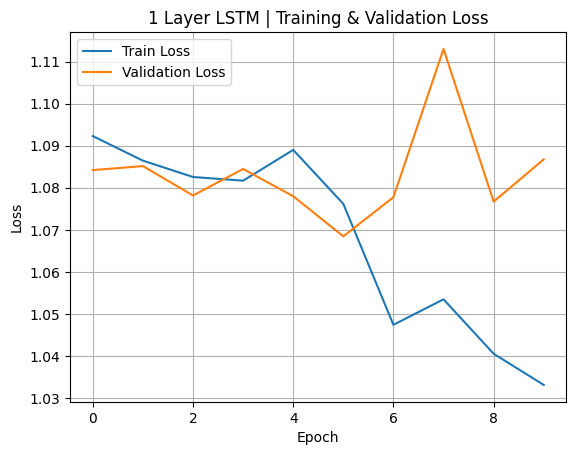


--- Training: 2 Layer LSTM ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,931 (1.62 MB)

 Trainable params: 424,931 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 6s - 362ms/step - accuracy: 0.3680 - loss: 1.0974 - val_accuracy: 0.3800 - val_loss: 1.0804
Epoch 2/10
16/16 - 1s - 79ms/step - accuracy: 0.3600 - loss: 1.0930 - val_accuracy: 0.3800 - val_loss: 1.0804
Epoch 3/10
16/16 - 1s - 78ms/step - accuracy: 0.3780 - loss: 1.0830 - val_accuracy: 0.3800 - val_loss: 1.0810
Epoch 4/10
16/16 - 1s - 77ms/step - accuracy: 0.3900 - loss: 1.0843 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 5/10
16/16 - 1s - 79ms/step - accuracy: 0.3880 - loss: 1.0811 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 6/10
16/16 - 1s - 76ms/step - accuracy: 0.3920 - loss: 1.0825 - val_accuracy: 0.3800 - val_loss: 1.0786
Epoch 7/10
16/16 - 1s - 80ms/step - accuracy: 0.3560 - loss: 1.0811 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 8/10
16/16 - 1s - 79ms/step - accuracy: 0.3600 - loss: 1.0815 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 9/10
16/16 - 1s - 77ms/step - accuracy: 0.3580 - loss: 1.0793 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 10/

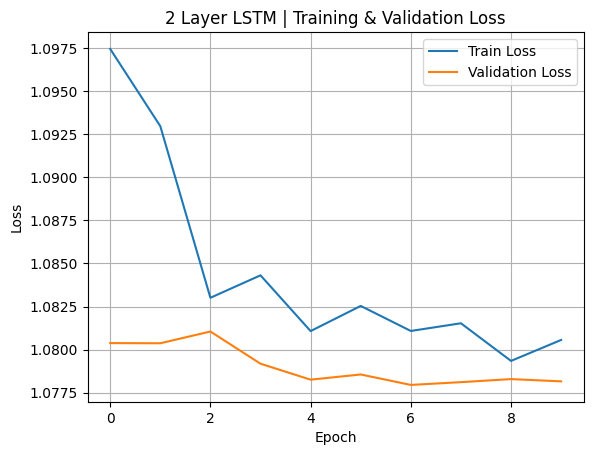


--- Training: 3 Layer LSTM ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 72, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 72, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428,019 (1.63 MB)

 Trainable params: 428,019 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 7s - 445ms/step - accuracy: 0.3760 - loss: 1.0900 - val_accuracy: 0.3800 - val_loss: 1.0797
Epoch 2/10
16/16 - 1s - 93ms/step - accuracy: 0.3640 - loss: 1.0830 - val_accuracy: 0.3800 - val_loss: 1.0902
Epoch 3/10
16/16 - 2s - 102ms/step - accuracy: 0.4040 - loss: 1.0855 - val_accuracy: 0.4000 - val_loss: 1.0770
Epoch 4/10
16/16 - 2s - 98ms/step - accuracy: 0.4580 - loss: 1.0307 - val_accuracy: 0.5200 - val_loss: 0.9703
Epoch 5/10
16/16 - 2s - 97ms/step - accuracy: 0.5580 - loss: 0.9647 - val_accuracy: 0.3800 - val_loss: 1.1614
Epoch 6/10
16/16 - 2s - 97ms/step - accuracy: 0.4320 - loss: 1.0627 - val_accuracy: 0.4000 - val_loss: 1.0823
Epoch 7/10
16/16 - 2s - 95ms/step - accuracy: 0.4540 - loss: 1.0382 - val_accuracy: 0.5100 - val_loss: 1.0014
Epoch 8/10
16/16 - 2s - 94ms/step - accuracy: 0.6640 - loss: 0.8315 - val_accuracy: 0.5000 - val_loss: 1.5196
Epoch 9/10
16/16 - 2s - 99ms/step - accuracy: 0.6580 - loss: 0.7275 - val_accuracy: 0.6200 - val_loss: 0.8716
Epoch 10

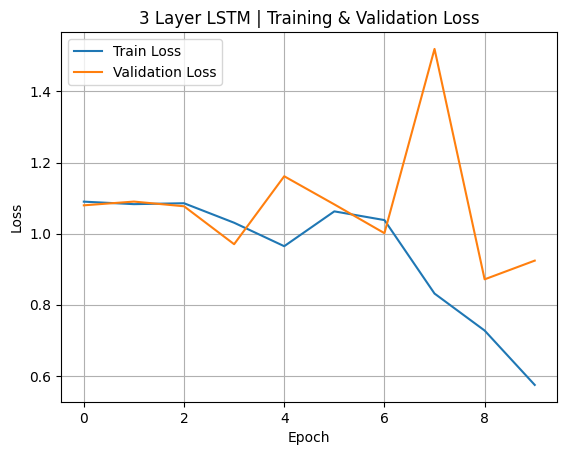

In [24]:
train_and_evaluate_all(LAYER_VARIATIONS, "Layer")




=== Unit Variations ===


--- Training: 32 Units ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 32)         │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,035 (1.50 MB)

 Trainable params: 392,035 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 5s - 326ms/step - accuracy: 0.3460 - loss: 1.1198 - val_accuracy: 0.3800 - val_loss: 1.0799
Epoch 2/10
16/16 - 1s - 60ms/step - accuracy: 0.3420 - loss: 1.0885 - val_accuracy: 0.3800 - val_loss: 1.0812
Epoch 3/10
16/16 - 1s - 60ms/step - accuracy: 0.3380 - loss: 1.0869 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 4/10
16/16 - 1s - 61ms/step - accuracy: 0.3860 - loss: 1.0775 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 5/10
16/16 - 1s - 60ms/step - accuracy: 0.3780 - loss: 1.0780 - val_accuracy: 0.3800 - val_loss: 1.0793
Epoch 6/10
16/16 - 1s - 63ms/step - accuracy: 0.3640 - loss: 1.0823 - val_accuracy: 0.3800 - val_loss: 1.0791
Epoch 7/10
16/16 - 1s - 63ms/step - accuracy: 0.3360 - loss: 1.0847 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 8/10
16/16 - 1s - 67ms/step - accuracy: 0.4060 - loss: 1.0764 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 9/10
16/16 - 1s - 65ms/step - accuracy: 0.3880 - loss: 1.0808 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 10/

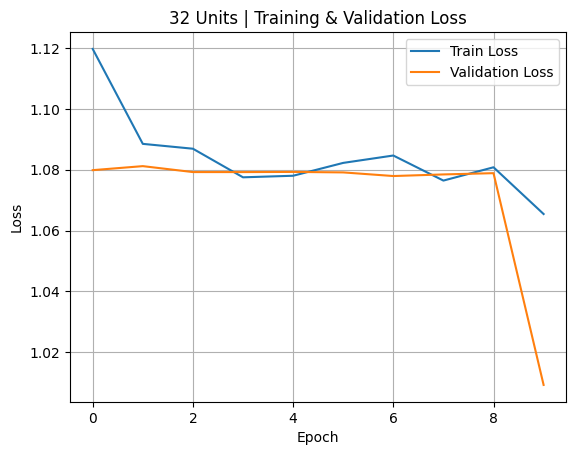


--- Training: 64 Units ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 445,635 (1.70 MB)

 Trainable params: 445,635 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 5s - 330ms/step - accuracy: 0.3480 - loss: 1.0997 - val_accuracy: 0.3700 - val_loss: 1.0807
Epoch 2/10
16/16 - 1s - 81ms/step - accuracy: 0.3680 - loss: 1.0846 - val_accuracy: 0.3800 - val_loss: 1.0829
Epoch 3/10
16/16 - 1s - 88ms/step - accuracy: 0.3820 - loss: 1.0838 - val_accuracy: 0.3800 - val_loss: 1.0823
Epoch 4/10
16/16 - 1s - 83ms/step - accuracy: 0.3940 - loss: 1.0813 - val_accuracy: 0.3800 - val_loss: 1.0826
Epoch 5/10
16/16 - 1s - 82ms/step - accuracy: 0.3920 - loss: 1.0776 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 6/10
16/16 - 1s - 86ms/step - accuracy: 0.3660 - loss: 1.0827 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 7/10
16/16 - 1s - 82ms/step - accuracy: 0.3640 - loss: 1.0838 - val_accuracy: 0.3800 - val_loss: 1.0778
Epoch 8/10
16/16 - 1s - 85ms/step - accuracy: 0.3660 - loss: 1.0814 - val_accuracy: 0.3900 - val_loss: 1.0788
Epoch 9/10
16/16 - 1s - 85ms/step - accuracy: 0.4320 - loss: 1.0616 - val_accuracy: 0.5000 - val_loss: 1.0318
Epoch 10/

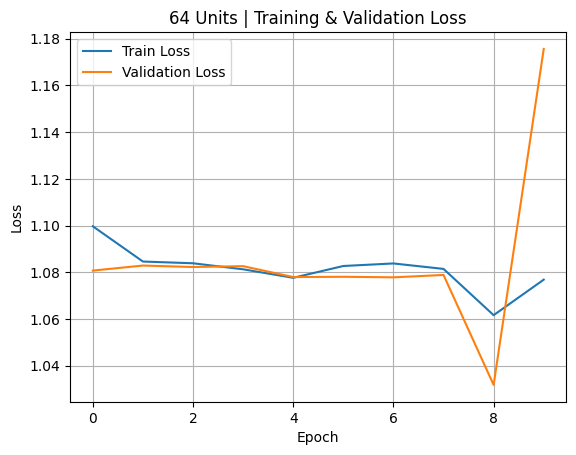


--- Training: 128 Units ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 626,563 (2.39 MB)

 Trainable params: 626,563 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 7s - 459ms/step - accuracy: 0.3760 - loss: 1.0972 - val_accuracy: 0.3800 - val_loss: 1.0821
Epoch 2/10
16/16 - 3s - 212ms/step - accuracy: 0.3740 - loss: 1.0830 - val_accuracy: 0.3800 - val_loss: 1.0797
Epoch 3/10
16/16 - 4s - 222ms/step - accuracy: 0.3840 - loss: 1.0855 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 4/10
16/16 - 4s - 225ms/step - accuracy: 0.3660 - loss: 1.0811 - val_accuracy: 0.3800 - val_loss: 1.0777
Epoch 5/10
16/16 - 3s - 209ms/step - accuracy: 0.3800 - loss: 1.0812 - val_accuracy: 0.3800 - val_loss: 1.0791
Epoch 6/10
16/16 - 3s - 211ms/step - accuracy: 0.4140 - loss: 1.0891 - val_accuracy: 0.2700 - val_loss: 1.1003
Epoch 7/10
16/16 - 3s - 206ms/step - accuracy: 0.4160 - loss: 1.0895 - val_accuracy: 0.3800 - val_loss: 1.0816
Epoch 8/10
16/16 - 3s - 210ms/step - accuracy: 0.3680 - loss: 1.0816 - val_accuracy: 0.3800 - val_loss: 1.0774
Epoch 9/10
16/16 - 3s - 218ms/step - accuracy: 0.4000 - loss: 1.0799 - val_accuracy: 0.3800 - val_loss: 1.0779
E

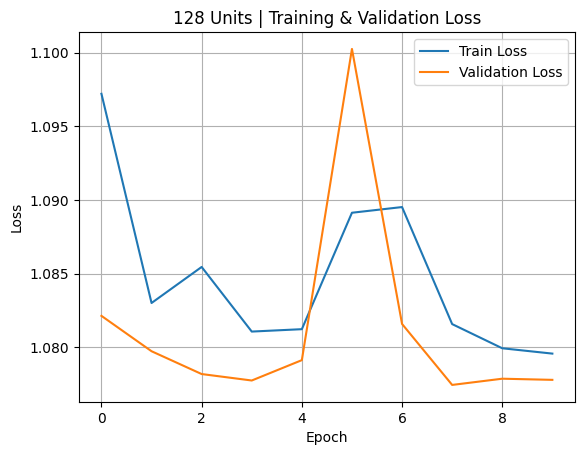

In [25]:
train_and_evaluate_all(UNIT_VARIATIONS, "Unit")



=== Direction Variations ===


--- Training: Unidirectional ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,931 (1.62 MB)

 Trainable params: 424,931 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 6s - 378ms/step - accuracy: 0.3680 - loss: 1.0965 - val_accuracy: 0.3800 - val_loss: 1.0819
Epoch 2/10
16/16 - 1s - 79ms/step - accuracy: 0.3940 - loss: 1.0896 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 3/10
16/16 - 1s - 78ms/step - accuracy: 0.3460 - loss: 1.0831 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 4/10
16/16 - 2s - 107ms/step - accuracy: 0.3860 - loss: 1.0817 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 5/10
16/16 - 1s - 87ms/step - accuracy: 0.3820 - loss: 1.0793 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 6/10
16/16 - 1s - 85ms/step - accuracy: 0.4200 - loss: 1.0701 - val_accuracy: 0.5600 - val_loss: 0.9495
Epoch 7/10
16/16 - 1s - 86ms/step - accuracy: 0.4340 - loss: 1.0356 - val_accuracy: 0.3800 - val_loss: 1.0883
Epoch 8/10
16/16 - 2s - 102ms/step - accuracy: 0.3740 - loss: 1.0954 - val_accuracy: 0.3800 - val_loss: 1.0795
Epoch 9/10
16/16 - 1s - 85ms/step - accuracy: 0.3840 - loss: 1.0776 - val_accuracy: 0.3800 - val_loss: 1.0795
Epoch 1

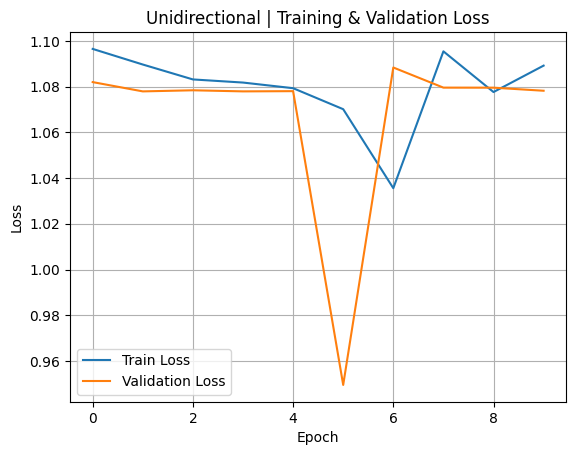


--- Training: Bidirectional ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 72, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,235 (1.92 MB)

 Trainable params: 503,235 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 9s - 545ms/step - accuracy: 0.5260 - loss: 0.9717 - val_accuracy: 0.5900 - val_loss: 0.8167
Epoch 2/10
16/16 - 2s - 119ms/step - accuracy: 0.8540 - loss: 0.4438 - val_accuracy: 0.6900 - val_loss: 0.8428
Epoch 3/10
16/16 - 2s - 121ms/step - accuracy: 0.9620 - loss: 0.1671 - val_accuracy: 0.7600 - val_loss: 0.7872
Epoch 4/10
16/16 - 2s - 141ms/step - accuracy: 0.9880 - loss: 0.0576 - val_accuracy: 0.7600 - val_loss: 0.9522
Epoch 5/10
16/16 - 2s - 144ms/step - accuracy: 0.9900 - loss: 0.0435 - val_accuracy: 0.7800 - val_loss: 1.0970
Epoch 6/10
16/16 - 2s - 110ms/step - accuracy: 0.9900 - loss: 0.0427 - val_accuracy: 0.7900 - val_loss: 0.9829
Epoch 7/10
16/16 - 2s - 119ms/step - accuracy: 0.9960 - loss: 0.0186 - val_accuracy: 0.7500 - val_loss: 1.1478
Epoch 8/10
16/16 - 2s - 105ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.7200 - val_loss: 1.3592
Epoch 9/10
16/16 - 2s - 109ms/step - accuracy: 0.9980 - loss: 0.0051 - val_accuracy: 0.7300 - val_loss: 1.3969
E

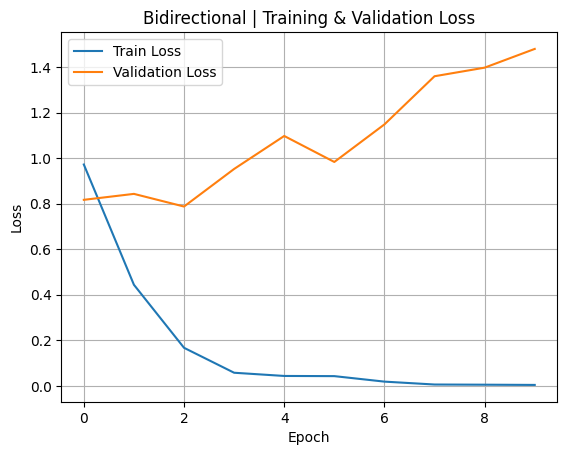


--- Training: Mixed Direction ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 72, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 482,531 (1.84 MB)

 Trainable params: 482,531 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 19s - 1s/step - accuracy: 0.3680 - loss: 1.0991 - val_accuracy: 0.3800 - val_loss: 1.0902
Epoch 2/10
16/16 - 2s - 105ms/step - accuracy: 0.4160 - loss: 1.0834 - val_accuracy: 0.3800 - val_loss: 1.0851
Epoch 3/10
16/16 - 2s - 103ms/step - accuracy: 0.3580 - loss: 1.0859 - val_accuracy: 0.3900 - val_loss: 1.0810
Epoch 4/10
16/16 - 2s - 140ms/step - accuracy: 0.3500 - loss: 1.0866 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 5/10
16/16 - 2s - 109ms/step - accuracy: 0.3700 - loss: 1.0842 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 6/10
16/16 - 2s - 102ms/step - accuracy: 0.3900 - loss: 1.0814 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 7/10
16/16 - 2s - 108ms/step - accuracy: 0.4480 - loss: 1.0465 - val_accuracy: 0.5100 - val_loss: 1.2774
Epoch 8/10
16/16 - 2s - 107ms/step - accuracy: 0.3680 - loss: 1.1596 - val_accuracy: 0.3800 - val_loss: 1.0908
Epoch 9/10
16/16 - 2s - 116ms/step - accuracy: 0.3680 - loss: 1.0924 - val_accuracy: 0.3800 - val_loss: 1.0802
Epo

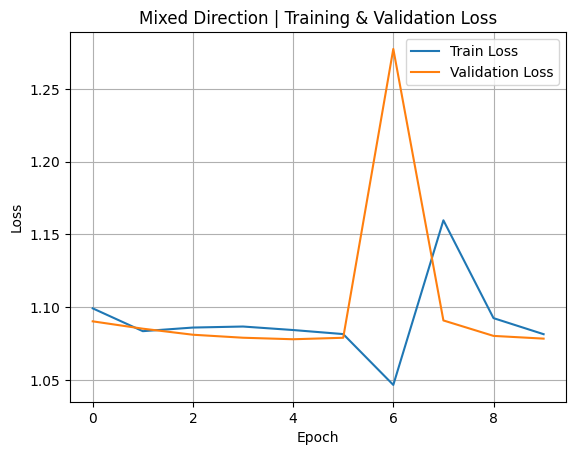

In [26]:
train_and_evaluate_all(DIRECTION_VARIATIONS, "Direction")




=== Training Forward LSTM from Scratch ===



c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,611 (1.57 MB)

 Trainable params: 412,611 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 6s - 400ms/step - accuracy: 0.4060 - loss: 1.0909 - val_accuracy: 0.3800 - val_loss: 1.0882
Epoch 2/10
16/16 - 1s - 74ms/step - accuracy: 0.3780 - loss: 1.0868 - val_accuracy: 0.3800 - val_loss: 1.0835
Epoch 3/10
16/16 - 1s - 81ms/step - accuracy: 0.3920 - loss: 1.0808 - val_accuracy: 0.3800 - val_loss: 1.0819
Epoch 4/10
16/16 - 1s - 74ms/step - accuracy: 0.3600 - loss: 1.0836 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 5/10
16/16 - 1s - 70ms/step - accuracy: 0.3960 - loss: 1.0791 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 6/10
16/16 - 1s - 70ms/step - accuracy: 0.3880 - loss: 1.0794 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 7/10
16/16 - 1s - 74ms/step - accuracy: 0.3400 - loss: 1.0802 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 8/10
16/16 - 1s - 78ms/step - accuracy: 0.3880 - loss: 1.0788 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 9/10
16/16 - 1s - 77ms/step - accuracy: 0.3900 - loss: 1.0795 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 10/

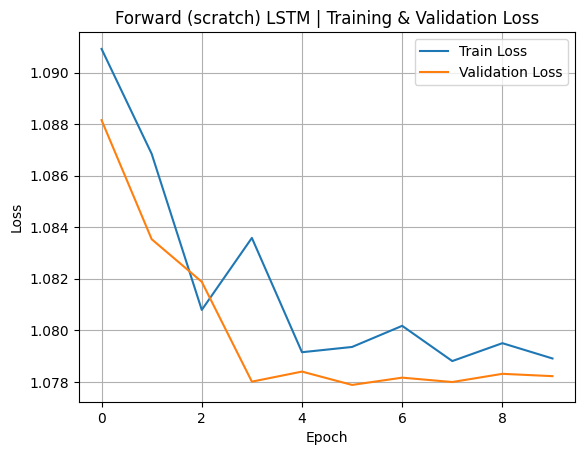

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step

Perbandingan Prediksi:
Sample     Keras      Scratch   
------------------------------
0          0          0         
1          0          0         
2          0          0         
3          0          0         
4          0          0         
5          0          0         
6          0          0         
7          0          0         
8          0          0         
9          0          0         
10         0          0         
11         0          0         
12         0          0         
13         0          0         
14         0          0         
15         0          0         
16         0          0         
17         0          0         
18         0          0         
19         0          0         
20         0          0         
21         0          0         
22         0          0         
23         0          0         
24         0          0         
25         0          0         
26         0  

In [31]:
train_forward_scratch()